<a href="https://colab.research.google.com/github/ArunRamji/Skin-cancer-detection/blob/master/Skin_cancer_VGGnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import files
#uploaded = files.upload()

#!unzip /content/drive/My Drive/Datasets/Skin_cancer.zip -d /Dataset

!unzip -uq "/content/drive/My Drive/Datasets/Skin_cancer.zip" -d "/Dataset"


In [2]:
#to check gpu connected
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6602401913119276305, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 853497195116501803
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15285217857849395136
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6181780381073538773
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
#Model1 - VGG

import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

#import dropout class if needed
from keras.layers import Dropout

from keras import regularizers

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",strides=1))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",strides=1))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units=4096,activation='relu'))
                     #,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(rate=0.5))
#Layer 4
#Fully connected layer 2
model.add(Dense(units=4096,activation='relu'))
                     #,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(rate=0.5))
#Layer 5
#Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

#compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Using TensorFlow backend.


In [3]:
#Model 2 - Sinmple CNN

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

#Image Augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255, #rescaling pixel value bw 0 and 1
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest'
        )

#Just Feature scaling
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
       '/Dataset/Skin_cancer/training',
        target_size=(150, 150),
        batch_size=13,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/Dataset/Skin_cancer/testing',
        target_size=(150, 150),
        batch_size=13,
        class_mode='binary')

Found 1729 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [5]:
#sample of how would augmentation look a like

img = load_img('/Dataset/Skin_cancer/training/Malignant/ISIC_0000013.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir='/Dataset/', save_prefix='skin', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [6]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=1729//13,   #number of input (image)
        epochs=50,
        validation_data=test_set
        ,shuffle=True
        ,validation_steps=208//13)          
        # number of training sample

model.save('firstry.h5')

Epoch 1/50
133/133 [==============================] - 34s 258ms/step - loss: 0.7235 - accuracy: 0.4905 - val_loss: 0.6805 - val_accuracy: 0.5000
Epoch 2/50
133/133 [==============================] - 31s 231ms/step - loss: 0.6979 - accuracy: 0.5205 - val_loss: 0.6795 - val_accuracy: 0.4952
Epoch 3/50
133/133 [==============================] - 30s 229ms/step - loss: 0.7023 - accuracy: 0.5448 - val_loss: 0.6985 - val_accuracy: 0.4808
Epoch 4/50
133/133 [==============================] - 31s 231ms/step - loss: 0.6927 - accuracy: 0.5564 - val_loss: 0.7271 - val_accuracy: 0.4904
Epoch 5/50
133/133 [==============================] - 31s 229ms/step - loss: 0.6987 - accuracy: 0.5512 - val_loss: 0.7039 - val_accuracy: 0.4375
Epoch 6/50
133/133 [==============================] - 30s 227ms/step - loss: 0.6839 - accuracy: 0.5732 - val_loss: 0.6776 - val_accuracy: 0.4712
Epoch 7/50
133/133 [==============================] - 31s 232ms/step - loss: 0.6857 - accuracy: 0.5795 - val_loss: 1.1756 - val_ac

In [7]:
#print(history.history.keys())
test_set.class_indices

{'Malignant': 0, 'beningn': 1}

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [9]:
model.save_weights('first_try.h5')

In [10]:
training_set.class_indices

{'Malignant': 0, 'beningn': 1}

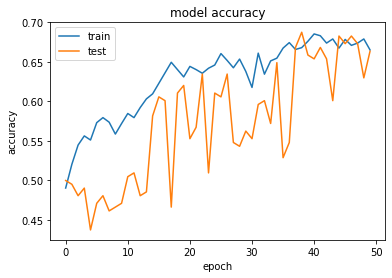

In [11]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

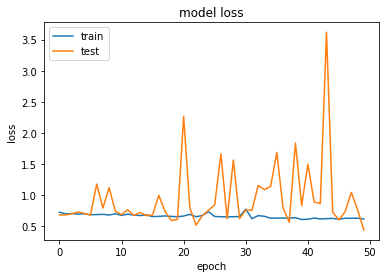

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
#PART 3 - Prediction

import numpy as np
from keras.preprocessing import image
test_image = image.load_img(
'//Dataset/Skin_cancer/testing/beningn/ISIC_0033836.jpg',
        target_size = (150,150))
test_image = image.img_to_array(test_image) #making it 3D array as input layer is 3D     
test_image = np.expand_dims(test_image,axis=0) #adding bias variable

%timeit  
result = model.predict(test_set)

training_set.class_indices  #to check the value of outplut class assigned

if result[0] > 0.5:
    #prediction = "Benign"
    print("Looks like Benign !")
else:
  print("Looks like Malignant ")



Looks like Benign !
